**Used Google Collab for GPU acceleration in order for faster performance.**

In [1]:
# Imports for pytorch
import numpy as np
import torch
import torchvision
from torchvision import transforms
from torch import nn
import matplotlib
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
from torch.utils.data import DataLoader


In [2]:
# Determine the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

Using device cuda


# **Training Fashion MNIST Dataset**

In [3]:
# Creating the datasets
transform = torchvision.transforms.ToTensor()

training_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

validation_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15336686.96it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270452.17it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5086545.38it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5404825.28it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
#Citation for code chunks: https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
validation_dataloader = DataLoader(validation_data, batch_size=batch_size)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP().to(device)
print(model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 60
training_acc = []
training_loss = []
validation_acc = []
validation_loss = []
for epoch in np.arange(epochs):
    print(f"\nEpoch {epoch+1}\n-------------------------------")
    size = len(train_dataloader.dataset)
    num_batches = len(train_dataloader)
    train_loss, other_correct = 0, 0
    model.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        other_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        train_loss += loss_fn(pred, y).item()
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
    train_loss /= num_batches
    other_correct /= size
    training_acc.append(100*other_correct)
    training_loss.append(train_loss)
    print("Training Accuracy: ", (100*other_correct))
    size = len(validation_dataloader.dataset)
    num_batches = len(validation_dataloader)
    model.eval()
    val_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in validation_dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            val_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    val_loss /= num_batches
    correct /= size
    validation_acc.append(100*correct)
    validation_loss.append(val_loss)
    print("Validation Accuracy: ", (100*correct))
print('Training Accuracy: ', training_acc)
print('Validation Accuracy: ', validation_acc)
print('Training Loss: ', training_loss)
print('Validation Loss: ', validation_loss)

MLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

Epoch 1
-------------------------------
Training Accuracy:  29.496666666666666
Validation Accuracy:  37.3

Epoch 2
-------------------------------
Training Accuracy:  40.32333333333333
Validation Accuracy:  43.269999999999996

Epoch 3
-------------------------------
Training Accuracy:  45.68
Validation Accuracy:  47.93

Epoch 4
-------------------------------
Training Accuracy:  53.48333333333334
Validation Accuracy:  57.440000000000005

Epoch 5
-------------------------------
Training Accuracy:  60.781666666666666
Validation Accuracy:  61.4

Epoch 6
-------------------------------
Training Accuracy:  63.705
Validation Accuracy:  63.36000000000001

Epoch 7
-------------------------------
Training Accuracy:  65.18166666666667
Validation Accuracy:  64.62

Epoch 8
------------------

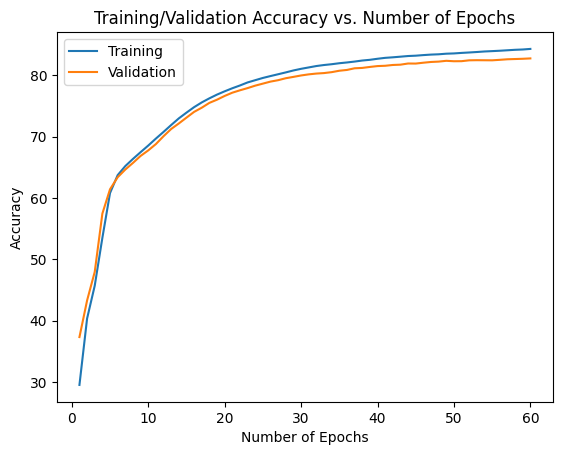

In [5]:
plt.plot(np.arange(1, 61), training_acc)
plt.plot(np.arange(1, 61), validation_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training/Validation Accuracy vs. Number of Epochs')
plt.legend(["Training", "Validation"])
plt.show()

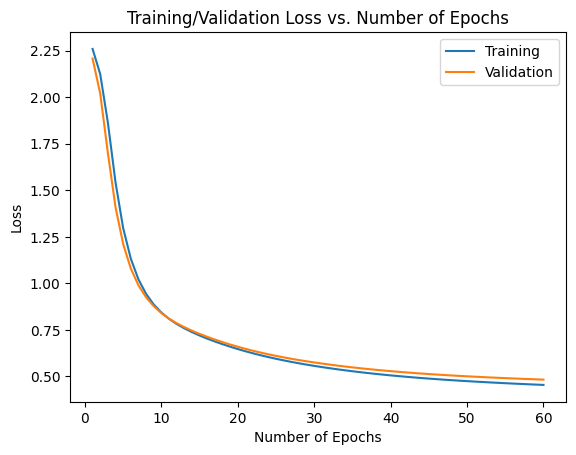

In [6]:
plt.plot(np.arange(1, 61), training_loss)
plt.plot(np.arange(1, 61), validation_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training/Validation Loss vs. Number of Epochs')
plt.legend(["Training", "Validation"])
plt.show()